In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [6]:
plt.style.use("seaborn-v0_8-whitegrid")
BASE_DIR = Path.cwd().parent
RAW = BASE_DIR / 'data' / 'raw' /  "restaurant_data.csv"
PROC = BASE_DIR / 'data' / 'processed' /  "processed_restaurant_data.csv"

raw = pd.read_csv(RAW, parse_dates=['date'])
proc = pd.read_csv(PROC, parse_dates=['date'])

raw.head(), proc.head()

(                        date     temp_c  is_weekend  promo  orders
 0 2025-07-28 10:18:45.317780  21.523585           0      1      97
 1 2025-07-29 10:18:45.317780  14.800079           0      0      90
 2 2025-07-30 10:18:45.317780  23.752256           0      1      96
 3 2025-07-31 10:18:45.317780  24.702824           0      0      76
 4 2025-08-01 10:18:45.317780  10.244824           0      1     103,
                         date     temp_c  is_weekend  promo  orders  \
 0 2025-07-28 10:18:45.317780  21.523585           0      1      97   
 1 2025-07-29 10:18:45.317780  14.800079           0      0      90   
 2 2025-07-30 10:18:45.317780  23.752256           0      1      96   
 3 2025-07-31 10:18:45.317780  24.702824           0      0      76   
 4 2025-08-01 10:18:45.317780  10.244824           0      1     103   
 
    day_of_week  month  rolling_orders_7d  
 0            0      7          97.000000  
 1            1      7          93.500000  
 2            2      7         

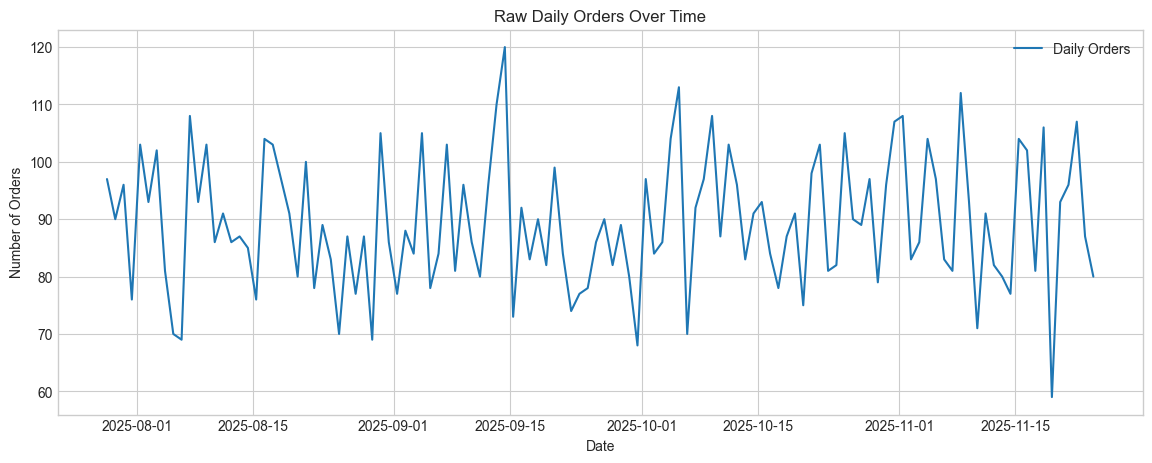

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(raw["date"], raw["orders"], label="Daily Orders")
plt.title("Raw Daily Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.legend()
plt.show()

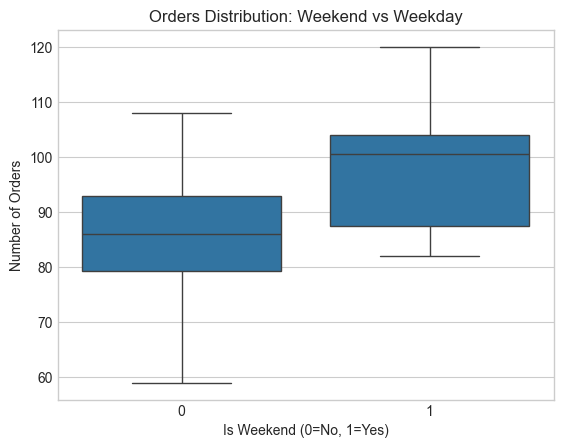

In [8]:
sns.boxplot(data=raw, x='is_weekend', y='orders')
plt.title("Orders Distribution: Weekend vs Weekday")
plt.xlabel("Is Weekend (0=No, 1=Yes)")
plt.ylabel("Number of Orders")
plt.show()

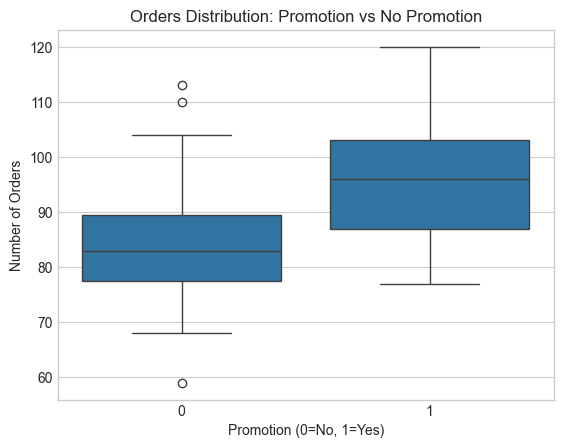

In [9]:
sns.boxplot(data=raw, x='promo', y='orders')
plt.title("Orders Distribution: Promotion vs No Promotion")
plt.xlabel("Promotion (0=No, 1=Yes)")
plt.ylabel("Number of Orders")
plt.show()

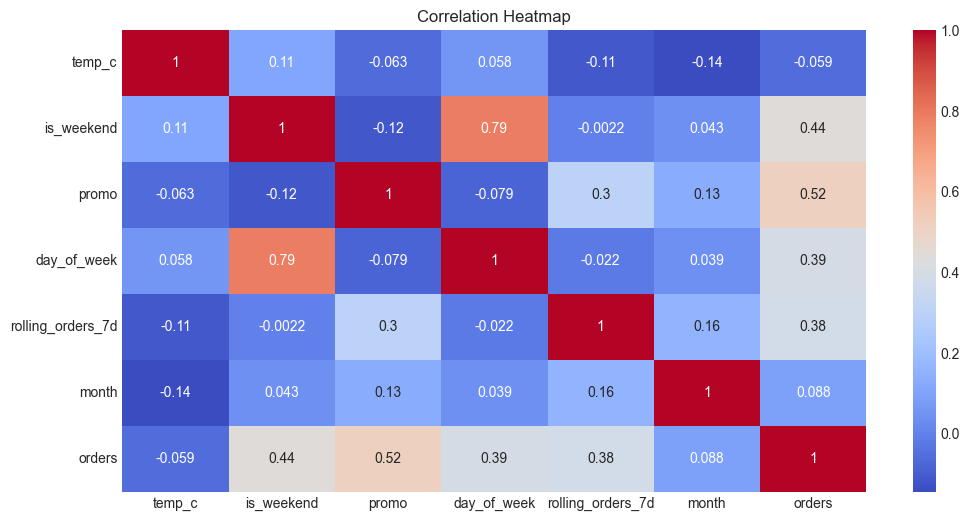

In [10]:
plt.figure(figsize=(12, 6))
corr = proc[["temp_c", "is_weekend", "promo", "day_of_week","rolling_orders_7d","month","orders"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

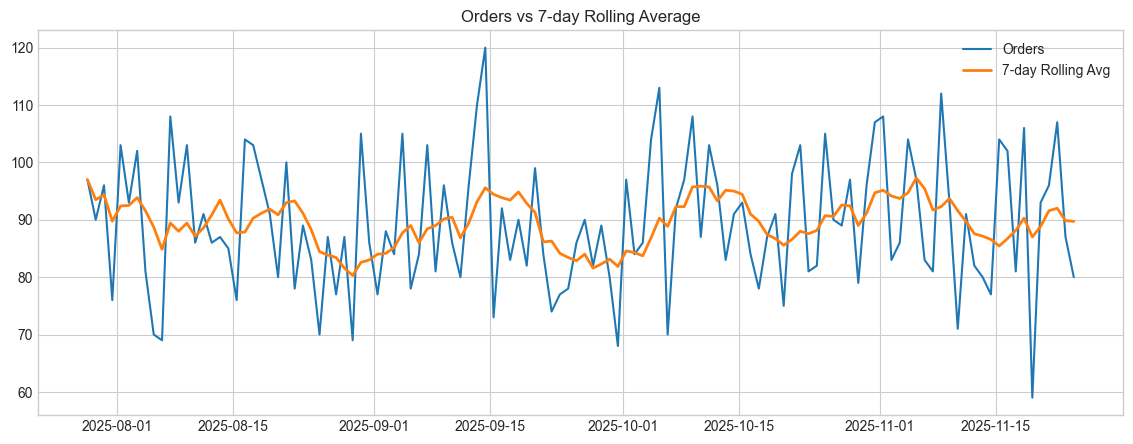

In [11]:
plt.figure(figsize=(14,5))
plt.plot(proc["date"], proc["orders"], label="Orders")
plt.plot(proc["date"], proc["rolling_orders_7d"], label="7-day Rolling Avg", linewidth=2)
plt.title("Orders vs 7-day Rolling Average")
plt.legend()
plt.show()

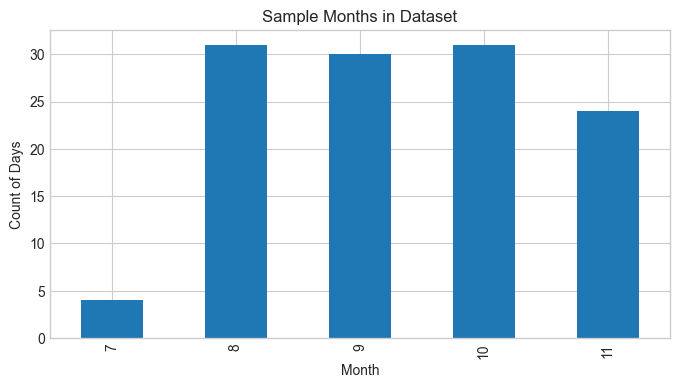

In [12]:
proc["month"].value_counts().sort_index().plot(kind="bar", figsize=(8,4))
plt.title("Sample Months in Dataset")
plt.xlabel("Month")
plt.ylabel("Count of Days")
plt.show()

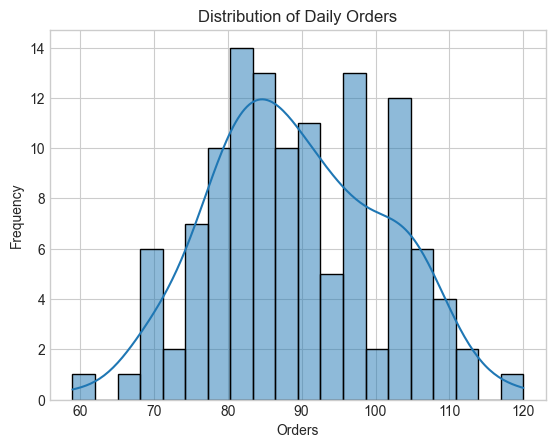

In [13]:
sns.histplot(raw["orders"], bins=20, kde=True)
plt.title("Distribution of Daily Orders")
plt.xlabel("Orders")
plt.ylabel("Frequency")
plt.show()
